# EDA and Ml modeling on "Adult" dataset

In [169]:
import pandas as pd  #importing important libraries
import seaborn as sns       
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
data = pd.read_csv('adult.csv') #loading the data which is in csv format

In [171]:
data.head() #first five rows

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [172]:
data.columns # wathcing number of columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [173]:
data.describe() # descriptive statistics of the data 

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Feature Scaling and Engineering

In [174]:
data = data.drop(columns=[' 77516',' 13',' 0',' 40',' 2174','39']) #droping unnecessary variables

In [175]:
corr = data.corr() #looking at corealtion

In [176]:
data.head()

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [178]:
data[' State-gov'].nunique()

9

In [179]:
#making categorcal values to numerical for prediction
data[' State-gov']=data[' State-gov'].map({' Self-emp-not-inc':0,
                         ' Private':1,
                        ' State-gov':2,
                        ' Federal-gov':3,
                        ' Local-gov':4,
                        ' Self-emp-inc':5,
                        ' Without-pay':6,
                        ' Never-worked':7,
                        ' ?':8
                
                        
})

In [180]:
data.head()

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
0,0,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,1,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,1,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,1,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,1,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [181]:
data.rename(columns={' <=50K':'Income'},inplace=True)

## Visualization

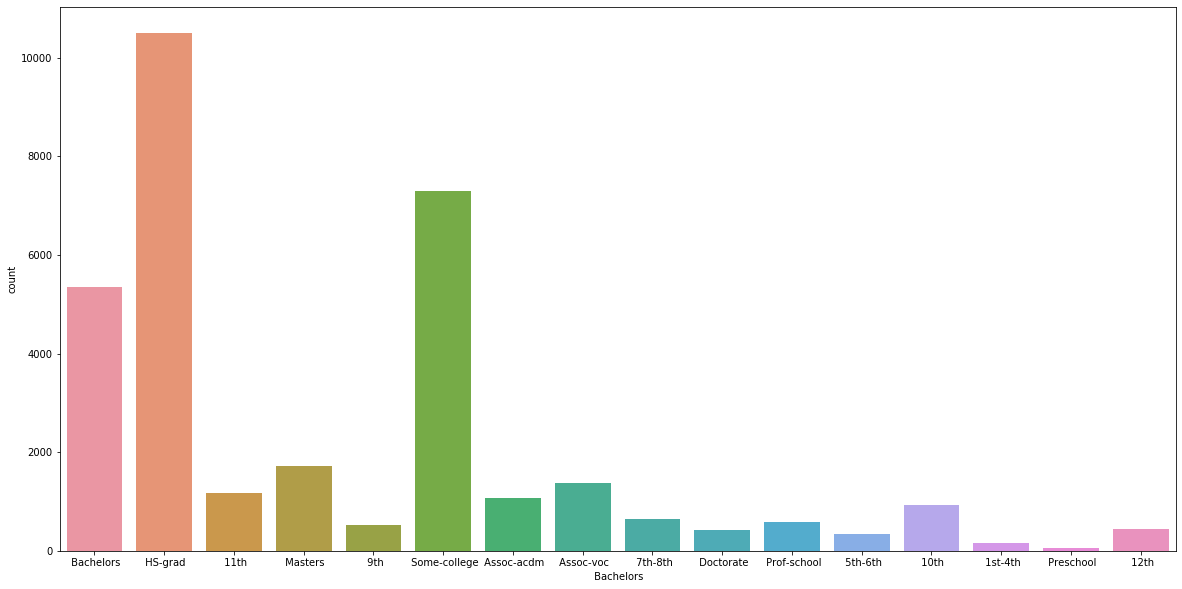

In [222]:
plt.figure(figsize=(20,10))
sns.countplot(data[' Bachelors'])
#Counting distribution over Bachelors

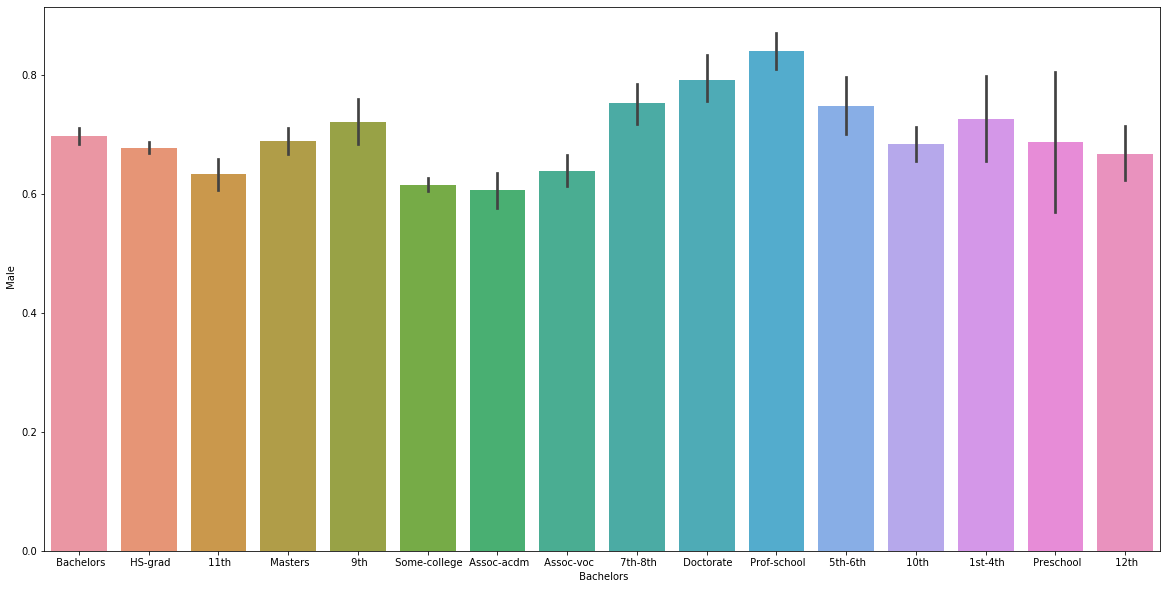

In [227]:
plt.figure(figsize=(20,10))
sns.barplot(data[' Bachelors'],data[' Male'],data=data)
#Between bachelors and Gender

In [183]:
data['Income']=data['Income'].map({' <=50K':0
                     , ' >50K':1
}) #making categorical to numerical for computation

In [184]:
data['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int64

In [185]:
data[' Male'].unique()

array([' Male', ' Female'], dtype=object)

In [186]:
data[' Male']=data[' Male'].map({" Male":1,
                  " Female":0})

In [187]:
data[' Not-in-family'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [188]:
data[' Not-in-family']=data[' Not-in-family'].map({" Not-in-family":0,
                            " Wife":1,
                            " Own-child":2,
                            " Unmarried":3,
                            " Other-relative":4,
                            " Husband":5
    
})

In [189]:
data[' United-States'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

### Using Naive Bayes Algorthim


In [190]:
data.head()

,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,Income
0,0,Bachelors,Married-civ-spouse,Exec-managerial,5,White,1,United-States,0
1,1,HS-grad,Divorced,Handlers-cleaners,0,White,1,United-States,0
2,1,11th,Married-civ-spouse,Handlers-cleaners,5,Black,1,United-States,0
3,1,Bachelors,Married-civ-spouse,Prof-specialty,1,Black,0,Cuba,0
4,1,Masters,Married-civ-spouse,Exec-managerial,1,White,0,United-States,0


In [191]:
from sklearn.naive_bayes import GaussianNB

In [192]:
model = GaussianNB()

In [193]:
data[' State-gov'].isnull().sum()

0

In [194]:
x = data[[' State-gov',' Male',' Not-in-family']]

In [195]:
y = data['Income']

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [198]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [200]:
y_pred = model.predict(x_test)

In [203]:
cn = confusion_matrix(y_test,y_pred)

In [202]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [204]:
cn

array([[4571, 1622],
       [ 646, 1301]], dtype=int64)

In [207]:
accuracy = accuracy_score(y_test,y_pred)

## Accuracy of the model

In [208]:
accuracy

0.7213759213759213